['Gazole' 'SP95' 'GPLc' 'E85']
val MAX Gazole [1291.0, 1290.0, 1290.0]
val MIN Gazole [924.0, 929.0, 930.0]
val MAX SP95 [1422.0, 1421.0, 1421.0]
val MIN SP95 [1088.0, 1088.0, 1089.0]
val MAX GPLc [790.0, 790.0, 790.0]
val MIN GPLc [649.0, 649.0, 650.0]
val MAX E85 [840.0, 840.0, 840.0]
val MIN E85 [789.0, 789.0, 789.0]
651116
['Gazole' 'SP95' 'GPLc' 'E85']
val MAX Gazole [1530.0, 1530.0, 1530.0]
val MIN Gazole [893.0, 893.0, 893.0]
val MAX SP95 [1564.0, 1560.0, 1560.0]
val MIN SP95 [985.0, 986.0, 989.0]
val MAX GPLc [840.0, 840.0, 840.0]
val MIN GPLc [652.0, 658.0, 659.0]
val MAX E85 [926.0, 920.0, 920.0]
val MIN E85 [786.0, 788.0, 789.0]
1648177
['Gazole' 'SP95' 'GPLc' 'E10' 'E85']
val MAX Gazole [1108.0, 1108.0, 1108.0]
val MIN Gazole [876.0, 876.0, 876.0]
val MAX SP95 [1346.0, 1346.0, 1345.0]
val MIN SP95 [998.0, 998.0, 998.0]
val MAX GPLc [760.0, 760.0, 760.0]
val MIN GPLc [536.0, 544.0, 547.0]
val MAX E10 [1379.0, 1370.0, 1370.0]
val MIN E10 [1118.0, 1119.0, 1119.0]
val MAX E85 [

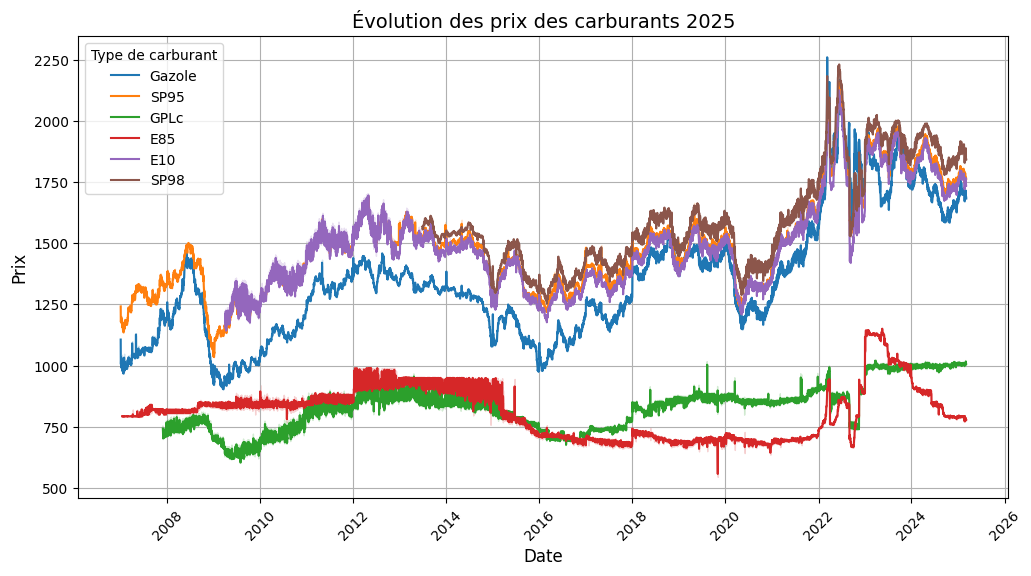

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

# graph: https://seaborn.pydata.org/examples/errorband_lineplots.html

df_combined = pd.DataFrame()
for i in range(19): # one year only
    year = 2007+i
# for i in range (19): # all years
#     year = 2007+i
    ### Input without transformation
    # file_path = f"results/inputs_csv/PrixCarburants_annuel_{year}.csv"
    ### Input with zscore and median
    # file_path = f"results/inputs_csv_zscore_median/PrixCarburants_annuel_filtered_{year}.csv"
    ### Input with zscore and last
    file_path = f"results/inputs_csv_zscore_last/PrixCarburants_annuel_filtered_{year}.csv"
    
    if not os.path.exists(file_path):
        print(f"Le fichier {file_path} n'existe pas.")
    else:
        df = pd.read_csv(file_path)
        if "/inputs_csv/" in file_path:
            df['date'] = pd.to_datetime(df['maj'], format='%Y_%m_%d_%H:%M', errors='coerce').dt.strftime('%Y_%m_%d')
    
        df_prices = df[["date", "nom", "valeur"]]
        df_prices["date"] = pd.to_datetime(df_prices["date"], format="%Y_%m_%d")
        
        # type carburant par dates
        print(df_prices["nom"].unique())
        list_carburant = df_prices["nom"].dropna().unique()
        for carburant in list_carburant:
            df_carburant = df_prices[df_prices["nom"]== carburant].sort_values(by=['valeur'])
            print(f"val MAX {carburant}", df_carburant.nlargest(3, 'valeur')['valeur'].tolist())
            print(f"val MIN {carburant}", df_carburant.nsmallest(3, 'valeur')['valeur'].tolist())

        # Filters if needed
        # df_prices = df_prices[df_prices["date"].between(f"{year}-05-01", f"{year}-07-01")]
        # df_prices = df_prices[df_prices["nom"].isin(["Gazole", "SP95", "SP98"])]
        # Définir une palette de couleurs personnalisée pour chaque type de carburant
        # couleurs = {"Gazole": "blue", "SP95": "green", "SP98": "red"}
        df_combined = pd.concat([df_combined, df_prices], ignore_index=True)
        print(len(df_combined))

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined, x="date", y="valeur", hue="nom")
# sns.lineplot(data=df_combined, x="date", y="valeur", hue="nom", marker="o")
# sns.lineplot(data=df_prices, x="date", y="valeur", hue="nom", marker="o", palette=couleurs)

# Personnalisation du graphique
plt.title(f"Évolution des prix des carburants {year}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Prix", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Type de carburant")
plt.grid(True)

# Afficher le graphique
plt.show()